## Observations and Insights 

1. Average tumor volume and mouse weight for mice on the Capomulin regimen have a strong positive correlation (r-squared value around 0.70).
2. Mice on the Capomulin and Ramicane treatments have a lower final tumor volume than mice on Infubinol and Ceftamin, so it could be that those drugs were better at reducing tumor volume.
3. The mean and median tumor volumes for the different drug regimens are similar, indicating that the results might be normally distributed. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data_df = pd.merge(mouse_metadata,study_results, on = "Mouse ID")

# Display the data table for preview
merged_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Check the number of mice.
unique_mice = merged_data_df["Mouse ID"].unique()
unique_mouse_count = len(unique_mice)
unique_mouse_count

249

In [3]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#New dataframe from duplicates based on Mouse ID and Timepoint
duplicate_df = merged_data_df[merged_data_df.duplicated(['Mouse ID', 'Timepoint'])]

#List of mouse IDs for duplicate rows
duplicate_list = duplicate_df['Mouse ID'].values.tolist()

#Create list of unique mouse IDs from duplicate_list
duplicate_IDs = []

for x in duplicate_list:
    if x not in duplicate_IDs:
        duplicate_IDs.append(x)

duplicate_IDs

['g989']

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
deleted_data = merged_data_df[merged_data_df["Mouse ID"].isin(duplicate_IDs)]

deleted_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_data_df[merged_data_df["Mouse ID"].isin(duplicate_IDs) == False]

In [6]:
# Check the number of mice in the clean DataFrame.
unique_mice2 = cleaned_df["Mouse ID"].unique()
unique_mouse_count2 = len(unique_mice2)
unique_mouse_count2

248

## Summary Statistics

In [7]:
# Method 1:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

grouped_df = cleaned_df.groupby(["Drug Regimen"])
mean = grouped_df["Tumor Volume (mm3)"].mean()
median = grouped_df["Tumor Volume (mm3)"].median()
variance = grouped_df["Tumor Volume (mm3)"].var()
stddev = grouped_df["Tumor Volume (mm3)"].std()
sem = grouped_df["Tumor Volume (mm3)"].sem()

Summary_df = pd.DataFrame(
    {"Mean": mean,
     "Median": median,
     "Variance" : variance,
     "Std Deviation": stddev,
     "SEM" : sem})

Summary_df

,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Method 2(optional): Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function. (https://pandas.pydata.org/pandas-docs/version/0.22.0/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)

Summary2_df = cleaned_df.groupby(["Drug Regimen"]).agg(
    {    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"] })

Summary2_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

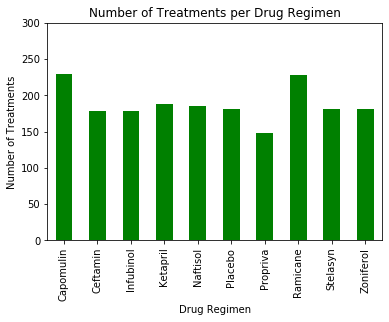

In [9]:
# Use Pandas to generate a bar plot showing the total number of mice in each treatment regimen throughout the course of the study. 

## Note: this plot will be identical to the one that uses Pyplot

# Find unique count of mouse ID for each drug regimen
mouse = cleaned_df.groupby(["Drug Regimen"])

mouse.count()

#Create dataframe for plotting
mouse_and_trt = pd.DataFrame(mouse["Mouse ID"].count())

#Plot dataframe
mouse_and_trt.plot(kind="bar",title="Number of Treatments per Drug Regimen",legend = False,color="green",ylim=(0,300)).set_ylabel("Number of Treatments")
plt.show()

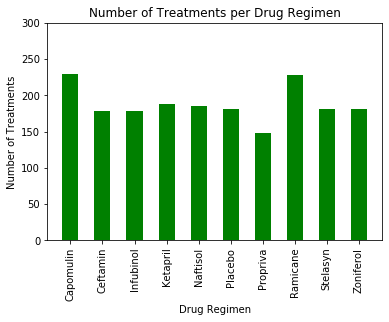

In [10]:
# Use Pyplot to generate a bar plot showing the total number of mice treatment in each treatment regimen throughout the course of the study.

##  Note: this plot will be identical to the one that uses Pandas

xvalue = mouse_and_trt.index
yvalue = mouse_and_trt["Mouse ID"]

plt.bar(xvalue,yvalue, color = "green", align = "center", width=0.5)
plt.xticks(rotation="vertical")
plt.ylim(0,300)
plt.title("Number of Treatments per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Treatments")

plt.show()

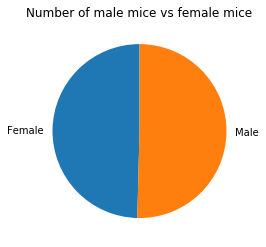

In [11]:
# Use Pandas to generate a pie plot showing the distribution of female versus male mice

## Note: this plot will be identical to the one that uses Pyplot

sex = cleaned_df.groupby(["Sex"])

sex_distb = pd.DataFrame(sex["Mouse ID"].nunique())
 
sex_distb.plot(kind='pie', y='Mouse ID',title="Number of male mice vs female mice", legend = False, startangle=90).set_ylabel("")

plt.show()

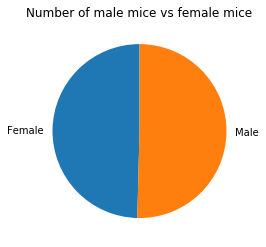

In [12]:
# Use Pyplot to generate a pie plot showing the distribution of female versus male mice

##  Note: this plot will be identical to the one that uses Pandas
plt.pie(sex_distb["Mouse ID"], labels=sex_distb.index, startangle=90)
plt.title("Number of male mice vs female mice")

plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the drug regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (latest) timepoint for each mouse
mouse_sort = cleaned_df.loc[cleaned_df.groupby(["Mouse ID"])["Timepoint"].idxmax()]

#Remove unneeded columns
mouse_last_timepoint = mouse_sort.drop(["Drug Regimen", "Sex", "Age_months", "Weight (g)", "Metastatic Sites", "Timepoint"], axis=1 )
mouse_last_timepoint = mouse_last_timepoint.rename( columns = {"Tumor Volume (mm3)" : "Final Tumor Volume"})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
data_with_last_df = pd.merge(cleaned_df, mouse_last_timepoint, on="Mouse ID", how = "left")

#Delete duplicate rows so there is only one row per mouse ID
Final_volume_df = data_with_last_df.drop_duplicates(subset=['Mouse ID'])


In [14]:
# Create empty lists to fill with tumor vol data (for plotting)
Cap_tumor_vol = []
Cap_outliers = []
Ram_tumor_vol = []
Ram_outliers = []
Inf_tumor_vol = []
Inf_outliers = []
Cef_tumor_vol = []
Cef_outliers = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
# Locate the rows which contain mice on each drug and get the tumor volumes
Cap_df = Final_volume_df[Final_volume_df["Drug Regimen"] == "Capomulin"] 
Cap_tumor_vol = Cap_df["Final Tumor Volume"]
Cap_tumor_vol = Cap_tumor_vol.reset_index(drop=True)

Ram_df = Final_volume_df[Final_volume_df["Drug Regimen"] == "Ramicane"] 
Ram_tumor_vol = Ram_df["Final Tumor Volume"]
Ram_tumor_vol = Ram_tumor_vol.reset_index(drop=True)

Inf_df = Final_volume_df[Final_volume_df["Drug Regimen"] == "Infubinol"] 
Inf_tumor_vol = Inf_df["Final Tumor Volume"]
Inf_tumor_vol = Inf_tumor_vol.reset_index(drop=True)    

Cef_df = Final_volume_df[Final_volume_df["Drug Regimen"] == "Ceftamin"] 
Cef_tumor_vol = Cef_df["Final Tumor Volume"]
Cef_tumor_vol = Cef_tumor_vol.reset_index(drop=True) 

# Determine outliers using upper and lower bounds

In [15]:
#Capomulin
Cap_quartiles = Cap_tumor_vol.quantile([.25, .5, .75])
Cap_lowerq = Cap_quartiles[0.25]
Cap_upperq = Cap_quartiles[0.75]
Cap_iqr = Cap_upperq - Cap_lowerq

print(f"The lower quartile of Capomulin tumor volumes is: {Cap_lowerq}")
print(f"The upper quartile of Capomulin tumor volumes is: {Cap_upperq}")
print(f"The interquartile range of Capomulin tumor volumes is: {Cap_iqr}")
print(f"The the median of Capomulin tumor volumes is: {Cap_quartiles[0.5]} ")

Cap_lower_bound = Cap_lowerq - (1.5*Cap_iqr)
Cap_upper_bound = Cap_upperq + (1.5*Cap_iqr)
print(f"Values below {Cap_lower_bound} could be outliers.")
print(f"Values above {Cap_upper_bound} could be outliers.")

for x in Cap_tumor_vol:
    if x <= Cap_lower_bound or x >= Cap_upper_bound:
        Cap_outliers.append(x)

if len(Cap_outliers)>0:
     print("Outliers: " + Cap_outliers)
else:
    print(f"There are 0 outliers." )   

The lower quartile of Capomulin tumor volumes is: 32.37735684
The upper quartile of Capomulin tumor volumes is: 40.1592203
The interquartile range of Capomulin tumor volumes is: 7.781863460000004
The the median of Capomulin tumor volumes is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
There are 0 outliers.


In [16]:
#Ramicane
Ram_quartiles = Ram_tumor_vol.quantile([.25, .5, .75])
Ram_lowerq = Ram_quartiles[0.25]
Ram_upperq = Ram_quartiles[0.75]
Ram_iqr = Ram_upperq - Ram_lowerq

print(f"The lower quartile of Ramicane tumor volumes is: {Ram_lowerq}")
print(f"The upper quartile of Ramicane tumor volumes is: {Ram_upperq}")
print(f"The interquartile range of Ramicane tumor volumes is: {Ram_iqr}")
print(f"The the median of Ramicane tumor volumes is: {Ram_quartiles[0.5]} ")

Ram_lower_bound = Ram_lowerq - (1.5*Ram_iqr)
Ram_upper_bound = Ram_upperq + (1.5*Ram_iqr)
print(f"Values below {Ram_lower_bound} could be outliers.")
print(f"Values above {Ram_upper_bound} could be outliers.")

for x in Ram_tumor_vol:
    if x <= Ram_lower_bound or x >= Ram_upper_bound:
        Ram_outliers.append(x)

if len(Ram_outliers)>0:
     print("Outliers: " + Ram_outliers)
else:
    print(f"There are 0 outliers." )   

The lower quartile of Ramicane tumor volumes is: 31.56046955
The upper quartile of Ramicane tumor volumes is: 40.65900627
The interquartile range of Ramicane tumor volumes is: 9.098536719999998
The the median of Ramicane tumor volumes is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
There are 0 outliers.


In [17]:
#Infubinol
Inf_quartiles = Inf_tumor_vol.quantile([.25, .5, .75])
Inf_lowerq = Inf_quartiles[0.25]
Inf_upperq = Inf_quartiles[0.75]
Inf_iqr = Inf_upperq - Inf_lowerq

print(f"The lower quartile of Infubinol tumor volumes is: {Inf_lowerq}")
print(f"The upper quartile of Infubinol tumor volumes is: {Inf_upperq}")
print(f"The interquartile range of Infubinol tumor volumes is: {Inf_iqr}")
print(f"The the median of Infubinol tumor volumes is: {Inf_quartiles[0.5]} ")

Inf_lower_bound = Inf_lowerq - (1.5*Inf_iqr)
Inf_upper_bound = Inf_upperq + (1.5*Inf_iqr)
print(f"Values below {Inf_lower_bound} could be outliers.")
print(f"Values above {Inf_upper_bound} could be outliers.")

for x in Inf_tumor_vol:
    if x <= Inf_lower_bound or x >= Inf_upper_bound:
        Inf_outliers.append(x)

if len(Inf_outliers)>0:
     print("Outliers: " + str(Inf_outliers))
else:
    print(f"There are 0 outliers." )  

The lower quartile of Infubinol tumor volumes is: 54.04860769
The upper quartile of Infubinol tumor volumes is: 65.52574285
The interquartile range of Infubinol tumor volumes is: 11.477135160000003
The the median of Infubinol tumor volumes is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Outliers: [36.321345799999996]


In [18]:
#Ceftamin
Cef_quartiles = Cef_tumor_vol.quantile([.25, .5, .75])
Cef_lowerq = Cef_quartiles[0.25]
Cef_upperq = Cef_quartiles[0.75]
Cef_iqr = Cef_upperq - Cef_lowerq

print(f"The lower quartile of Ceftamin tumor volumes is: {Cef_lowerq}")
print(f"The upper quartile of Ceftamin tumor volumes is: {Cef_upperq}")
print(f"The interquartile range of Ceftamin tumor volumes is: {Cef_iqr}")
print(f"The the median of Ceftamin tumor volumes is: {Cef_quartiles[0.5]} ")

Cef_lower_bound = Cef_lowerq - (1.5*Cef_iqr)
Cef_upper_bound = Cef_upperq + (1.5*Cef_iqr)
print(f"Values below {Cef_lower_bound} could be outliers.")
print(f"Values above {Cef_upper_bound} could be outliers.")

for x in Cef_tumor_vol:
    if x <= Cef_lower_bound or x >= Cef_upper_bound:
        Cef_outliers.append(x)

if len(Cef_outliers)>0:
     print("Outliers: " + Cef_outliers)
else:
    print(f"There are 0 outliers." )   

The lower quartile of Ceftamin tumor volumes is: 48.72207785
The upper quartile of Ceftamin tumor volumes is: 64.29983003
The interquartile range of Ceftamin tumor volumes is: 15.577752179999997
The the median of Ceftamin tumor volumes is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
There are 0 outliers.


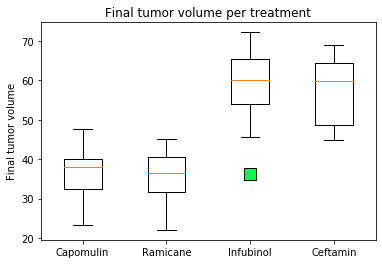

In [19]:
#Generate a box plot of the final tumor volume of each mouse across four regimens of interest
outlier_properties = dict(markerfacecolor = "#03fc4a", marker = 's', markersize ="12" )

plt.boxplot([Cap_tumor_vol, Ram_tumor_vol, Inf_tumor_vol, Cef_tumor_vol], flierprops=outlier_properties)
plt.xticks([1,2,3,4],["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], ha='center')
plt.ylabel("Final tumor volume")
plt.title("Final tumor volume per treatment")
plt.show()

## Line and Scatter Plots

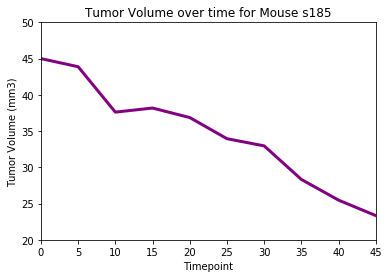

In [20]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin
s185_df = cleaned_df[cleaned_df["Mouse ID"] == "s185"]

plt.plot(s185_df["Timepoint"], s185_df["Tumor Volume (mm3)"], color = "purple", linewidth = 3)
plt.xlim(0,45)
plt.ylim(20,50)
plt.title("Tumor Volume over time for Mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 
CapAll_df = cleaned_df[cleaned_df["Drug Regimen"] == "Capomulin"]
Grouped_Cap = CapAll_df.groupby(["Mouse ID"])
Grouped_Cap_df = Grouped_Cap.mean()

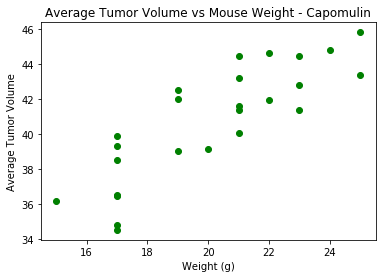

In [22]:
x_values = Grouped_Cap_df["Weight (g)"]
y_values = Grouped_Cap_df["Tumor Volume (mm3)"]

plt.scatter(x_values,y_values, facecolors = "g")
plt.title("Average Tumor Volume vs Mouse Weight - Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")
plt.show()

## Correlation and Regression

The r-squared is: 0.7088568047708717


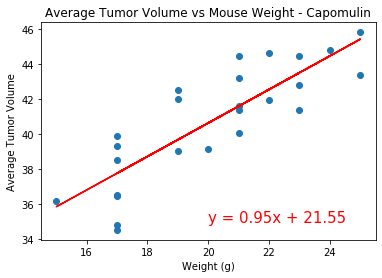

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen.
x_values = Grouped_Cap_df["Weight (g)"]
y_values = Grouped_Cap_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")
plt.title("Average Tumor Volume vs Mouse Weight - Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")
print(f"The r-squared is: {rvalue**2}")
plt.show()
